In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:

file_path = 'processed_financials.csv'
df = pd.read_csv(file_path)

print(df.head())
print(df.info())


  Family ID  total_spending  avg_spending_per_transaction    income  savings  \
0    FAM001        23188.90                    249.343011  113810.0  20234.0   
1    FAM002        22309.71                    253.519432   44592.0  29492.0   
2    FAM003        11220.34                    238.730638   33278.0  11365.0   
3    FAM004        23483.10                    247.190526  127196.0  30735.0   
4    FAM005        40246.21                    243.916424   66048.0   1212.0   

   monthly_expenses  loan_payments  credit_card_spending  dependents  \
0            5781.0         2422.0                2959.0         2.0   
1            5630.0         4541.0                 995.0         3.0   
2            5282.0         1042.0                2818.0         0.0   
3            3591.0         1571.0                 668.0         3.0   
4            3136.0         3444.0                1922.0         5.0   

   financial_goals_met  financial_score  
0                 68.0        62.186390  
1 

#### total Spending by Fam ID

C:\Users\Harsha\AppData\Local\Temp\ipykernel_6440\244245699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family ID', y='total_spending', data=top_families, palette="Blues_d")


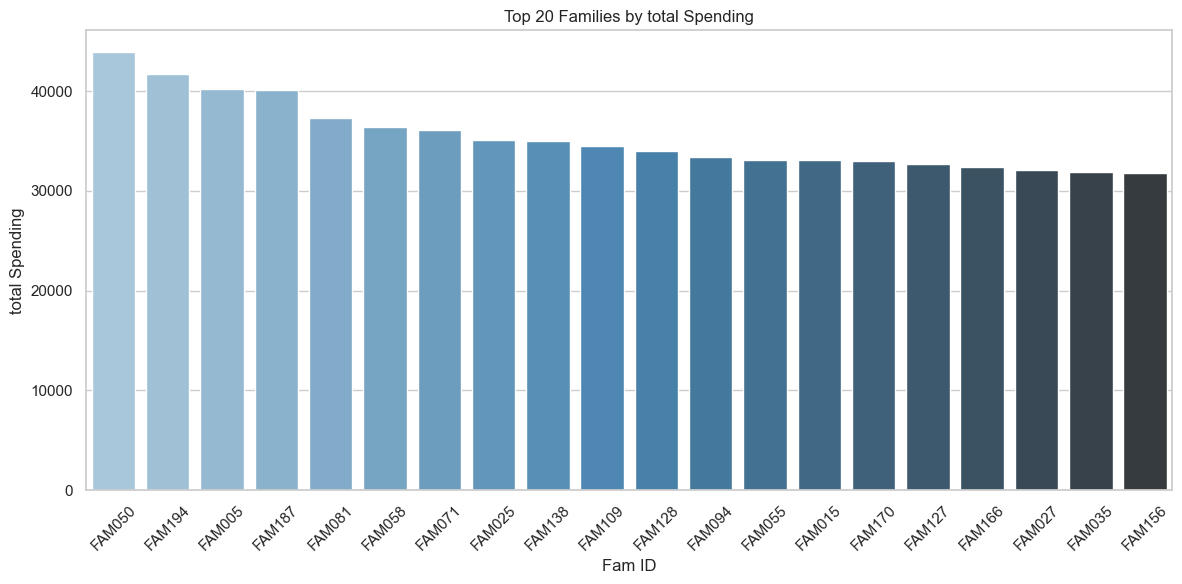

In [ ]:

plt.figure(figsize=(12, 6))
df['total_spending'] = pd.to_numeric(df['total_spending'], errors='coerce')  
top_families = df.nlargest(20, 'total_spending') 
sns.barplot(x='Family ID', y='total_spending', data=top_families, palette="Blues_d")
plt.xticks(rotation=45)
plt.title('Top 20 Families by total Spending')
plt.xlabel('Fam ID')
plt.ylabel('total Spending')
plt.tight_layout()
plt.show()


#### Savings to income ratio by fam ID

C:\Users\Harsha\AppData\Local\Temp\ipykernel_6440\2092226305.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family ID', y='savings_to_income', data=top_savings_ratio, palette="Greens_d")


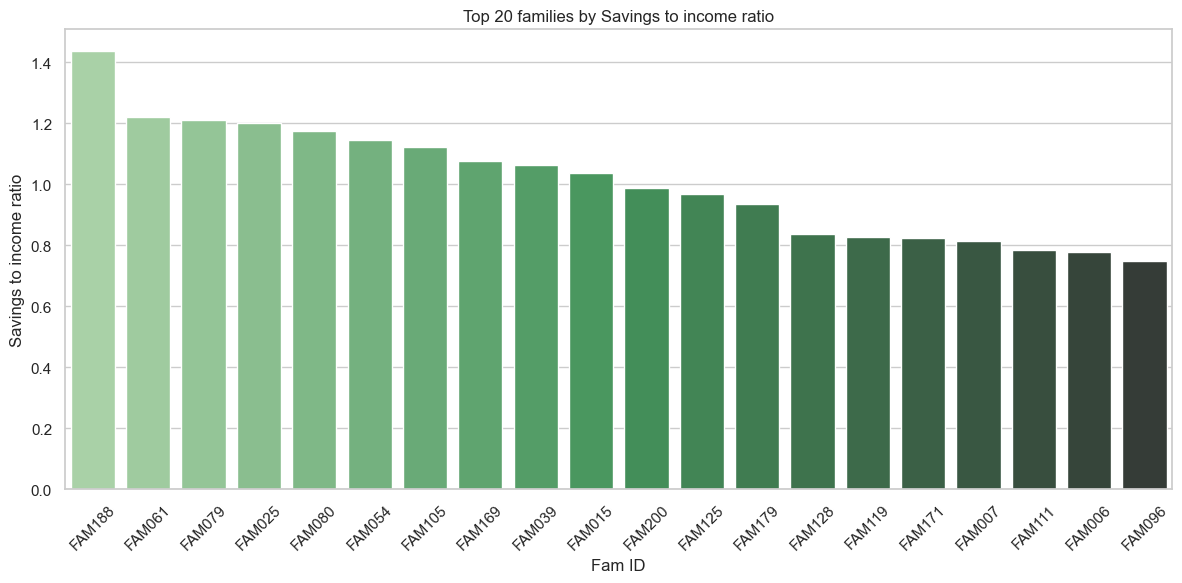

In [26]:

df['savings_to_income'] = df['savings'] / df['income']  # Calculate ratio
plt.figure(figsize=(12, 6))
top_savings_ratio = df.nlargest(20, 'savings_to_income')  # Show top 20 for clarity
sns.barplot(x='Family ID', y='savings_to_income', data=top_savings_ratio, palette="Greens_d")
plt.xticks(rotation=45)
plt.title('Top 20 families by Savings to income ratio')
plt.xlabel('Fam ID')
plt.ylabel('Savings to income ratio')
plt.tight_layout()
plt.show()


#### Financial score distribution

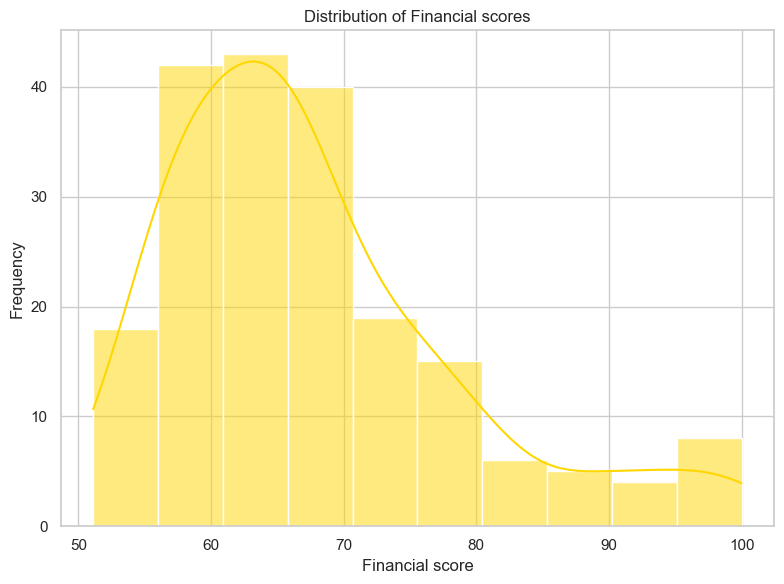

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['financial_score'], bins=10, kde=True, color="gold")
plt.title('Distribution of Financial scores')
plt.xlabel('Financial score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#### loan payments as a percentage of Income

C:\Users\Harsha\AppData\Local\Temp\ipykernel_6440\3994584358.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family ID', y='loan_to_income', data=top_loan_ratio, palette="Reds_d")


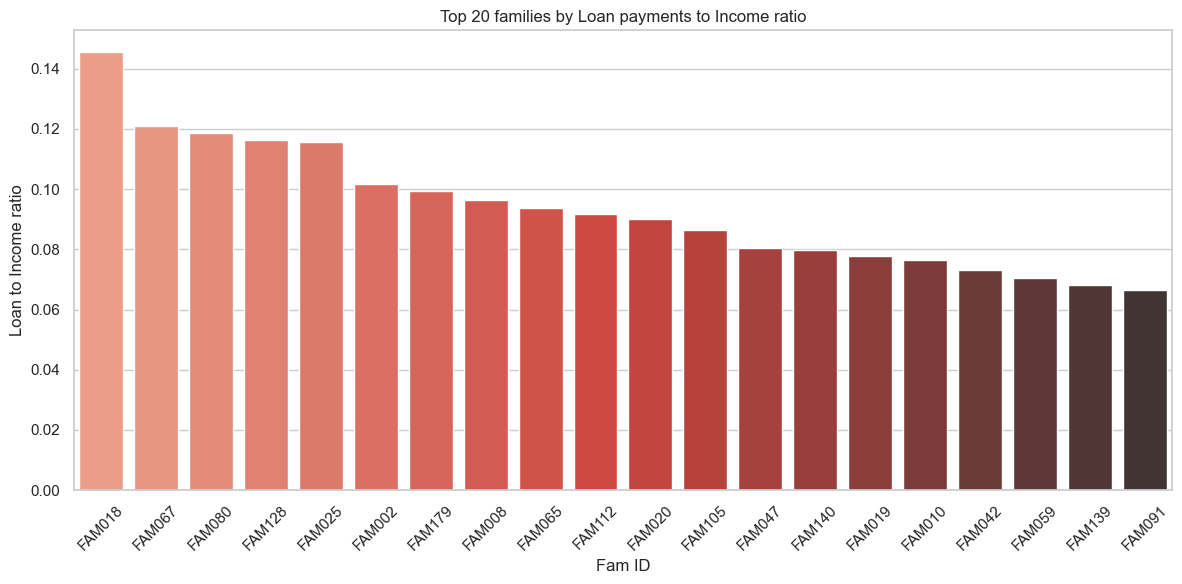

In [24]:

df['loan_to_income'] = df['loan_payments'] / df['income']  
plt.figure(figsize=(12, 6))
top_loan_ratio = df.nlargest(20, 'loan_to_income')  #  top 20
sns.barplot(x='Family ID', y='loan_to_income', data=top_loan_ratio, palette="Reds_d")
plt.xticks(rotation=45)
plt.title('Top 20 families by Loan payments to Income ratio')
plt.xlabel('Fam ID')
plt.ylabel('Loan to Income ratio')
plt.tight_layout()
plt.show()



#### Dependant vs Financial score

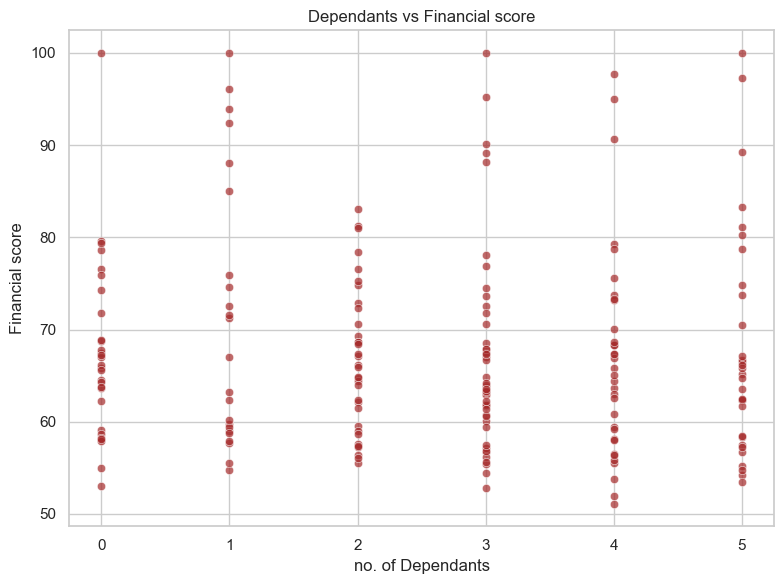

In [23]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='dependents', y='financial_score', data=df, color="brown", alpha=0.7)
plt.title('Dependants vs Financial score')
plt.xlabel('no. of Dependants')
plt.ylabel('Financial score')
plt.tight_layout()
plt.show()


#### Income vs Financial goals that are met, bubble chart can give a better representation than regular clustering chart as the bubbles here show proper overlapping and tells where every falls in the line of income

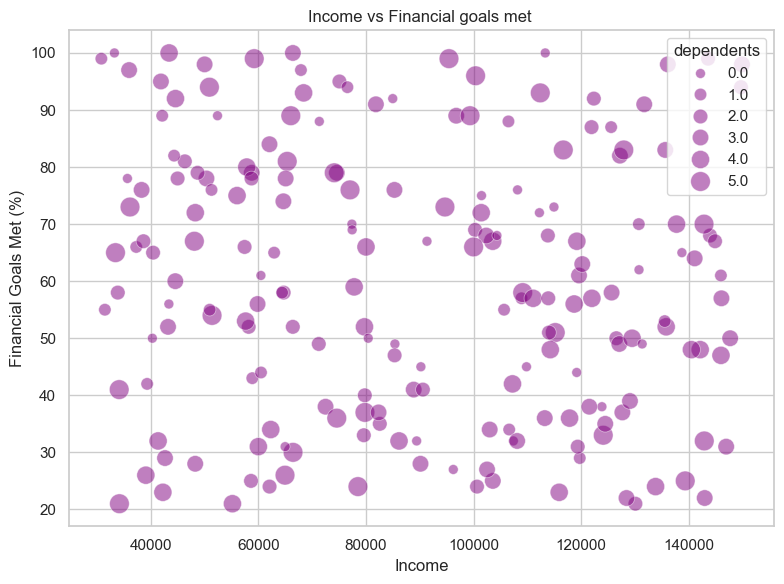

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='income', y='financial_goals_met', size='dependents', data=df, sizes=(50, 200), color="purple", alpha=0.5)
plt.title('Income vs Financial goals met ') #here the bubble size says the no.of dependants
plt.xlabel('Income')
plt.ylabel('Financial Goals Met (%)')
plt.tight_layout()
plt.show()

C:\Users\Harsha\AppData\Local\Temp\ipykernel_6440\861413847.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family ID', y='avg_spending_per_dependent', data=top_15, palette="coolwarm")


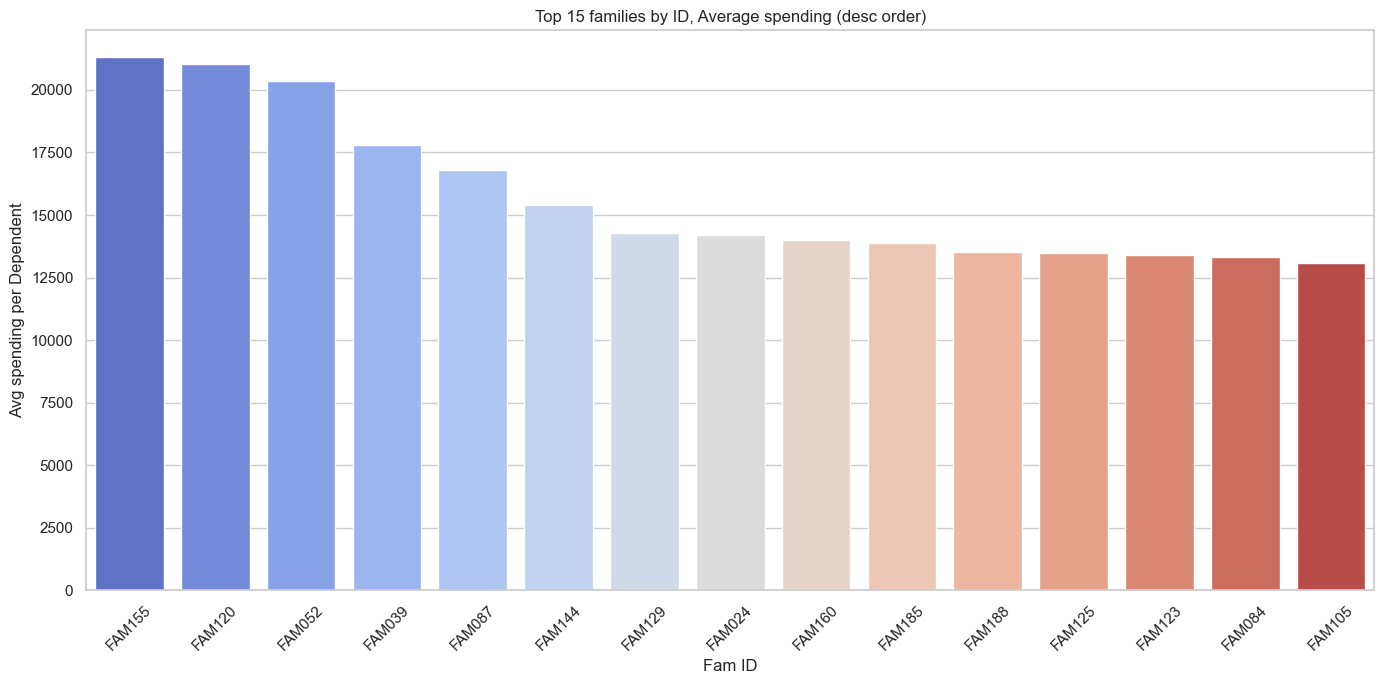

In [22]:
df['dependents'] = pd.to_numeric(df['dependents'], errors='coerce')
df['total_spending'] = pd.to_numeric(df['total_spending'], errors='coerce')


df['avg_spending_per_dependent'] = df['total_spending'] / df['dependents']

#  zero dependents 
df['avg_spending_per_dependent'] = df['avg_spending_per_dependent'].replace([float('inf'), float('nan')], 0)

#  average spending per dependent in descending order
top_15 = df.sort_values(by='avg_spending_per_dependent', ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x='Family ID', y='avg_spending_per_dependent', data=top_15, palette="coolwarm")

plt.xticks(rotation=45)
plt.title('Top 15 families by ID, Average spending (desc order)')
plt.xlabel('Fam ID')
plt.ylabel('Avg spending per Dependent')
plt.tight_layout()
plt.show()
